In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

The slope is 0.0006225550050356181 [1/nm] +/- 0.0002814299644812659 [1/nm] and the intercept is 0.07178442965813037[1/nm] +- 0.17419184891747647 [1/nm]
The approximate value of d according to the given values is: 1606.2837691631557 lines per mm.


/tmp/ipykernel_795/2305645533.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = legend_title,loc='best',prop={'size':20})


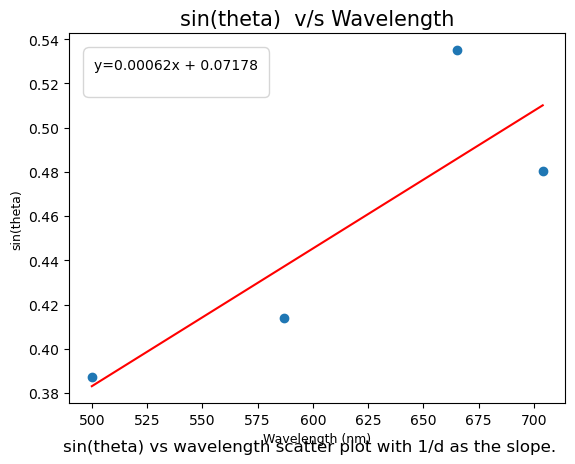

In [37]:
csv_data = pd.read_csv("diffraction.csv")
sine_angle = csv_data["sin(theta)"] 
wavelength = csv_data["wavelength"]
sine_angle = np.array(sine_angle)
wavelength = np.array(wavelength)

plt.scatter(wavelength,sine_angle)
plt.title("sin(theta)  v/s Wavelength",fontsize=15)
plt.xlabel("Wavelength (nm)",fontsize=9)
plt.ylabel("sin(theta)",fontsize=9)

coeffs, uncertainty = np.polyfit(wavelength, sine_angle, 1, cov=True)
slope = coeffs[0]
intercept = coeffs[1]
linear_fit = slope * wavelength + intercept
slope_uncer = np.sqrt(uncertainty[0,0])
intercept_uncer = np.sqrt(uncertainty[1,1])
print(f"The slope is {coeffs[0]} [1/nm] +/- {slope_uncer} [1/nm] and the intercept is {coeffs[1]}[1/nm] +- {intercept_uncer} [1/nm]")
legend_title = f"y={slope:.5f}x + {intercept:.5f}"
plt.legend(title = legend_title,loc='best',prop={'size':20})
d = 1/slope
print("The approximate value of d according to the given values is:",d,"lines per mm.")
plt.plot(wavelength,linear_fit,color = 'red')

caption = "sin(theta) vs wavelength scatter plot with 1/d as the slope."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('lab05.jpeg')
plt.show()